In [1]:
library(ape)
suppressPackageStartupMessages(library(seqinr))
suppressPackageStartupMessages(library(ggtree))

genomeDir <- "Genome_tree"

In [3]:
tree <- read.tree(file.path(genomeDir, "RAxML_bestTree.GTRGAMMA"))
tree <- drop.tip(tree, "EPI_ISL_402131")

In [4]:
info <- read.csv(file.path("Data", "info.csv"))

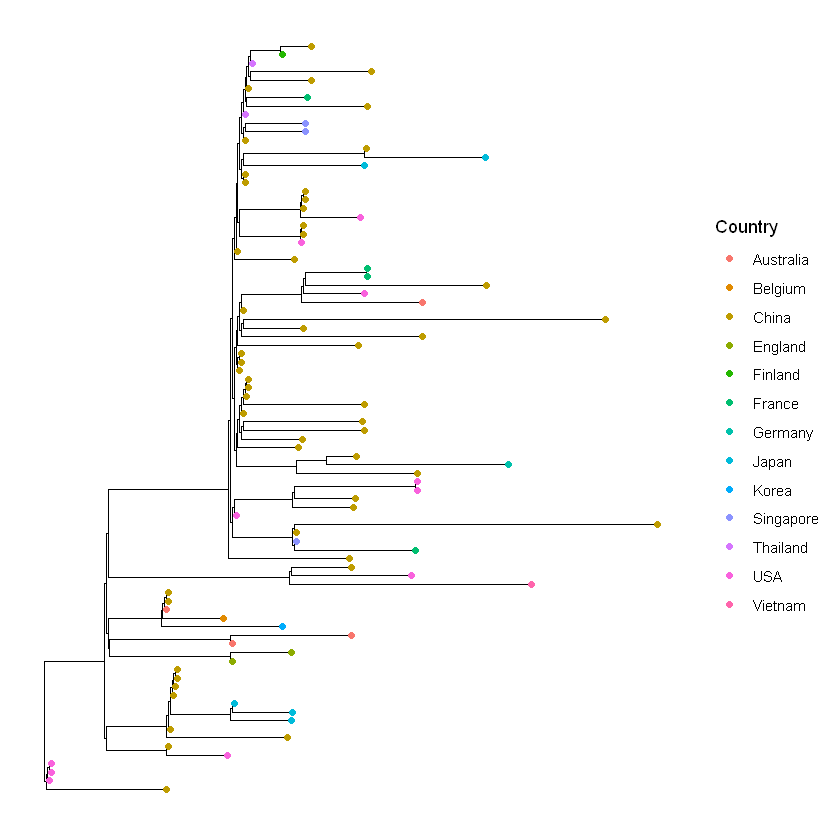

In [5]:
p <- ggtree(tree)
p <- p %<+% info + geom_tippoint(aes(color=Country))
p

In [12]:
reference <- "EPI_ISL_402123"

msa <- read.alignment(file.path(genomeDir, "aligned.fasta"), "fasta")

In [71]:
tree <- read.tree("tree.nwk")
info <- read.csv("info.csv")
snps <- read.csv("alleles.csv", header = F, row.names = 1, stringsAsFactor = F)

snps_strainCols <- snps[1,] 
snps<-snps[-1,] # drop strain names
colnames(snps) <- snps_strainCols

gapChar <- "?"
snp <- t(snps)
lsnp <- apply(snp, 1, function(x) {
        x != snp[1,] & x != gapChar & snp[1,] != gapChar
    })
lsnp <- as.data.frame(lsnp)
lsnp$pos <- as.numeric(rownames(lsnp))
lsnp <- tidyr::gather(lsnp, name, value, -pos)
snp_data <- lsnp[lsnp$value, c("name", "pos")]

## read the trait data
# bar_data <- read.csv(paste0(remote_folder, "bar.csv"))

# grp <- list()
# for (t in tree$tip.label) {
#     location <- as.character(info[which(info$id == t), "location"])
#     if (location %in% names(grp)) {
#         grp[[location]] <- c(grp[[location]], t)
#     } else {
#         grp[[location]] <- t
#     }
# }
# tree <- groupOTU(tree, grp, "loc")

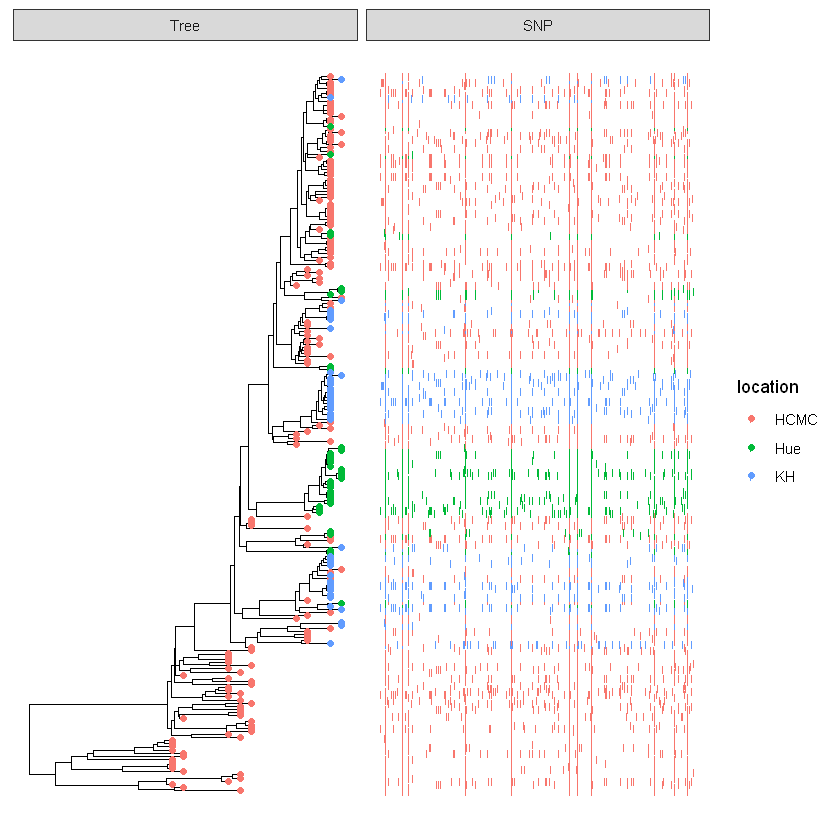

In [77]:
## visualize the tree 
p <- ggtree(tree)
## attach the sampling information data set 
## and add symbols colored by location
p <- p %<+% info + geom_tippoint(aes(color=location))
# aes(color=loc) 

## visualize SNP and Trait data using dot and bar charts,
## and align them based on tree structure
p + geom_facet(
    panel = "SNP",
    data = snp_data,
    geom = geom_point,
    mapping=aes(x = pos, color = location),
    shape = '|'
)
#     geom_facet(panel = "Trait", data = bar_data, geom = ggstance::geom_barh, 
#                 aes(x = dummy_bar_value, color = location, fill = location), 
#                 stat = "identity", width = .6) +
#     theme_tree2(legend.position=c(.05, .85))